<a href="https://colab.research.google.com/github/rameshkumarola/Bikash-Ramesh.AISC2007/blob/main/Bikash%2BRamesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning-Assignment2**

#Question 1 [1]

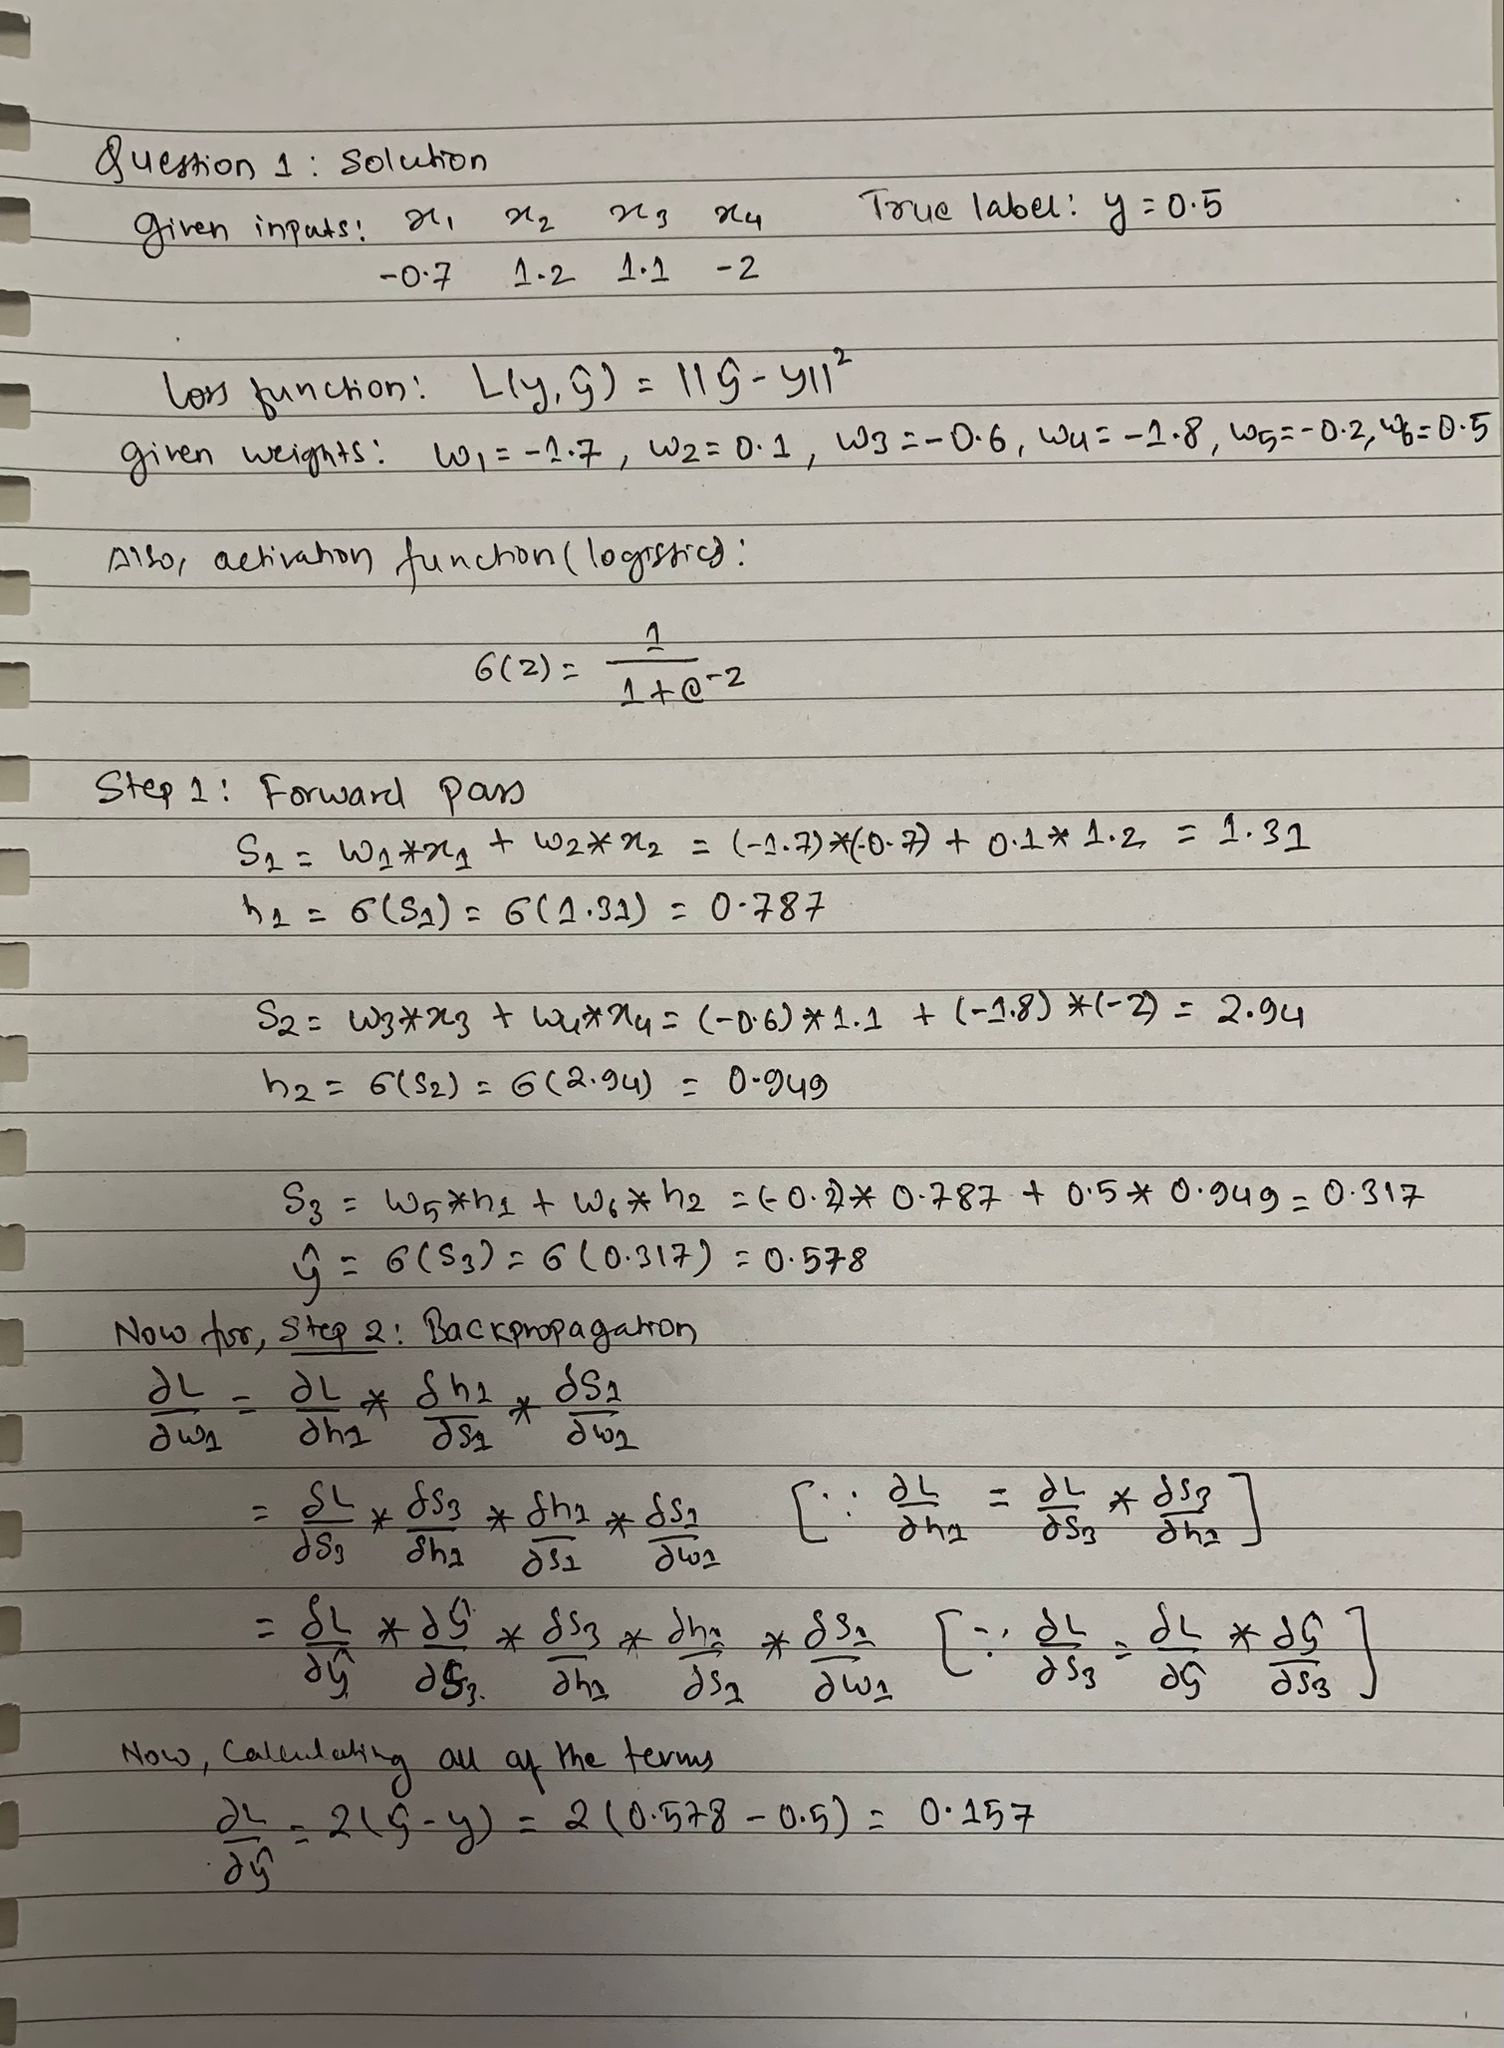

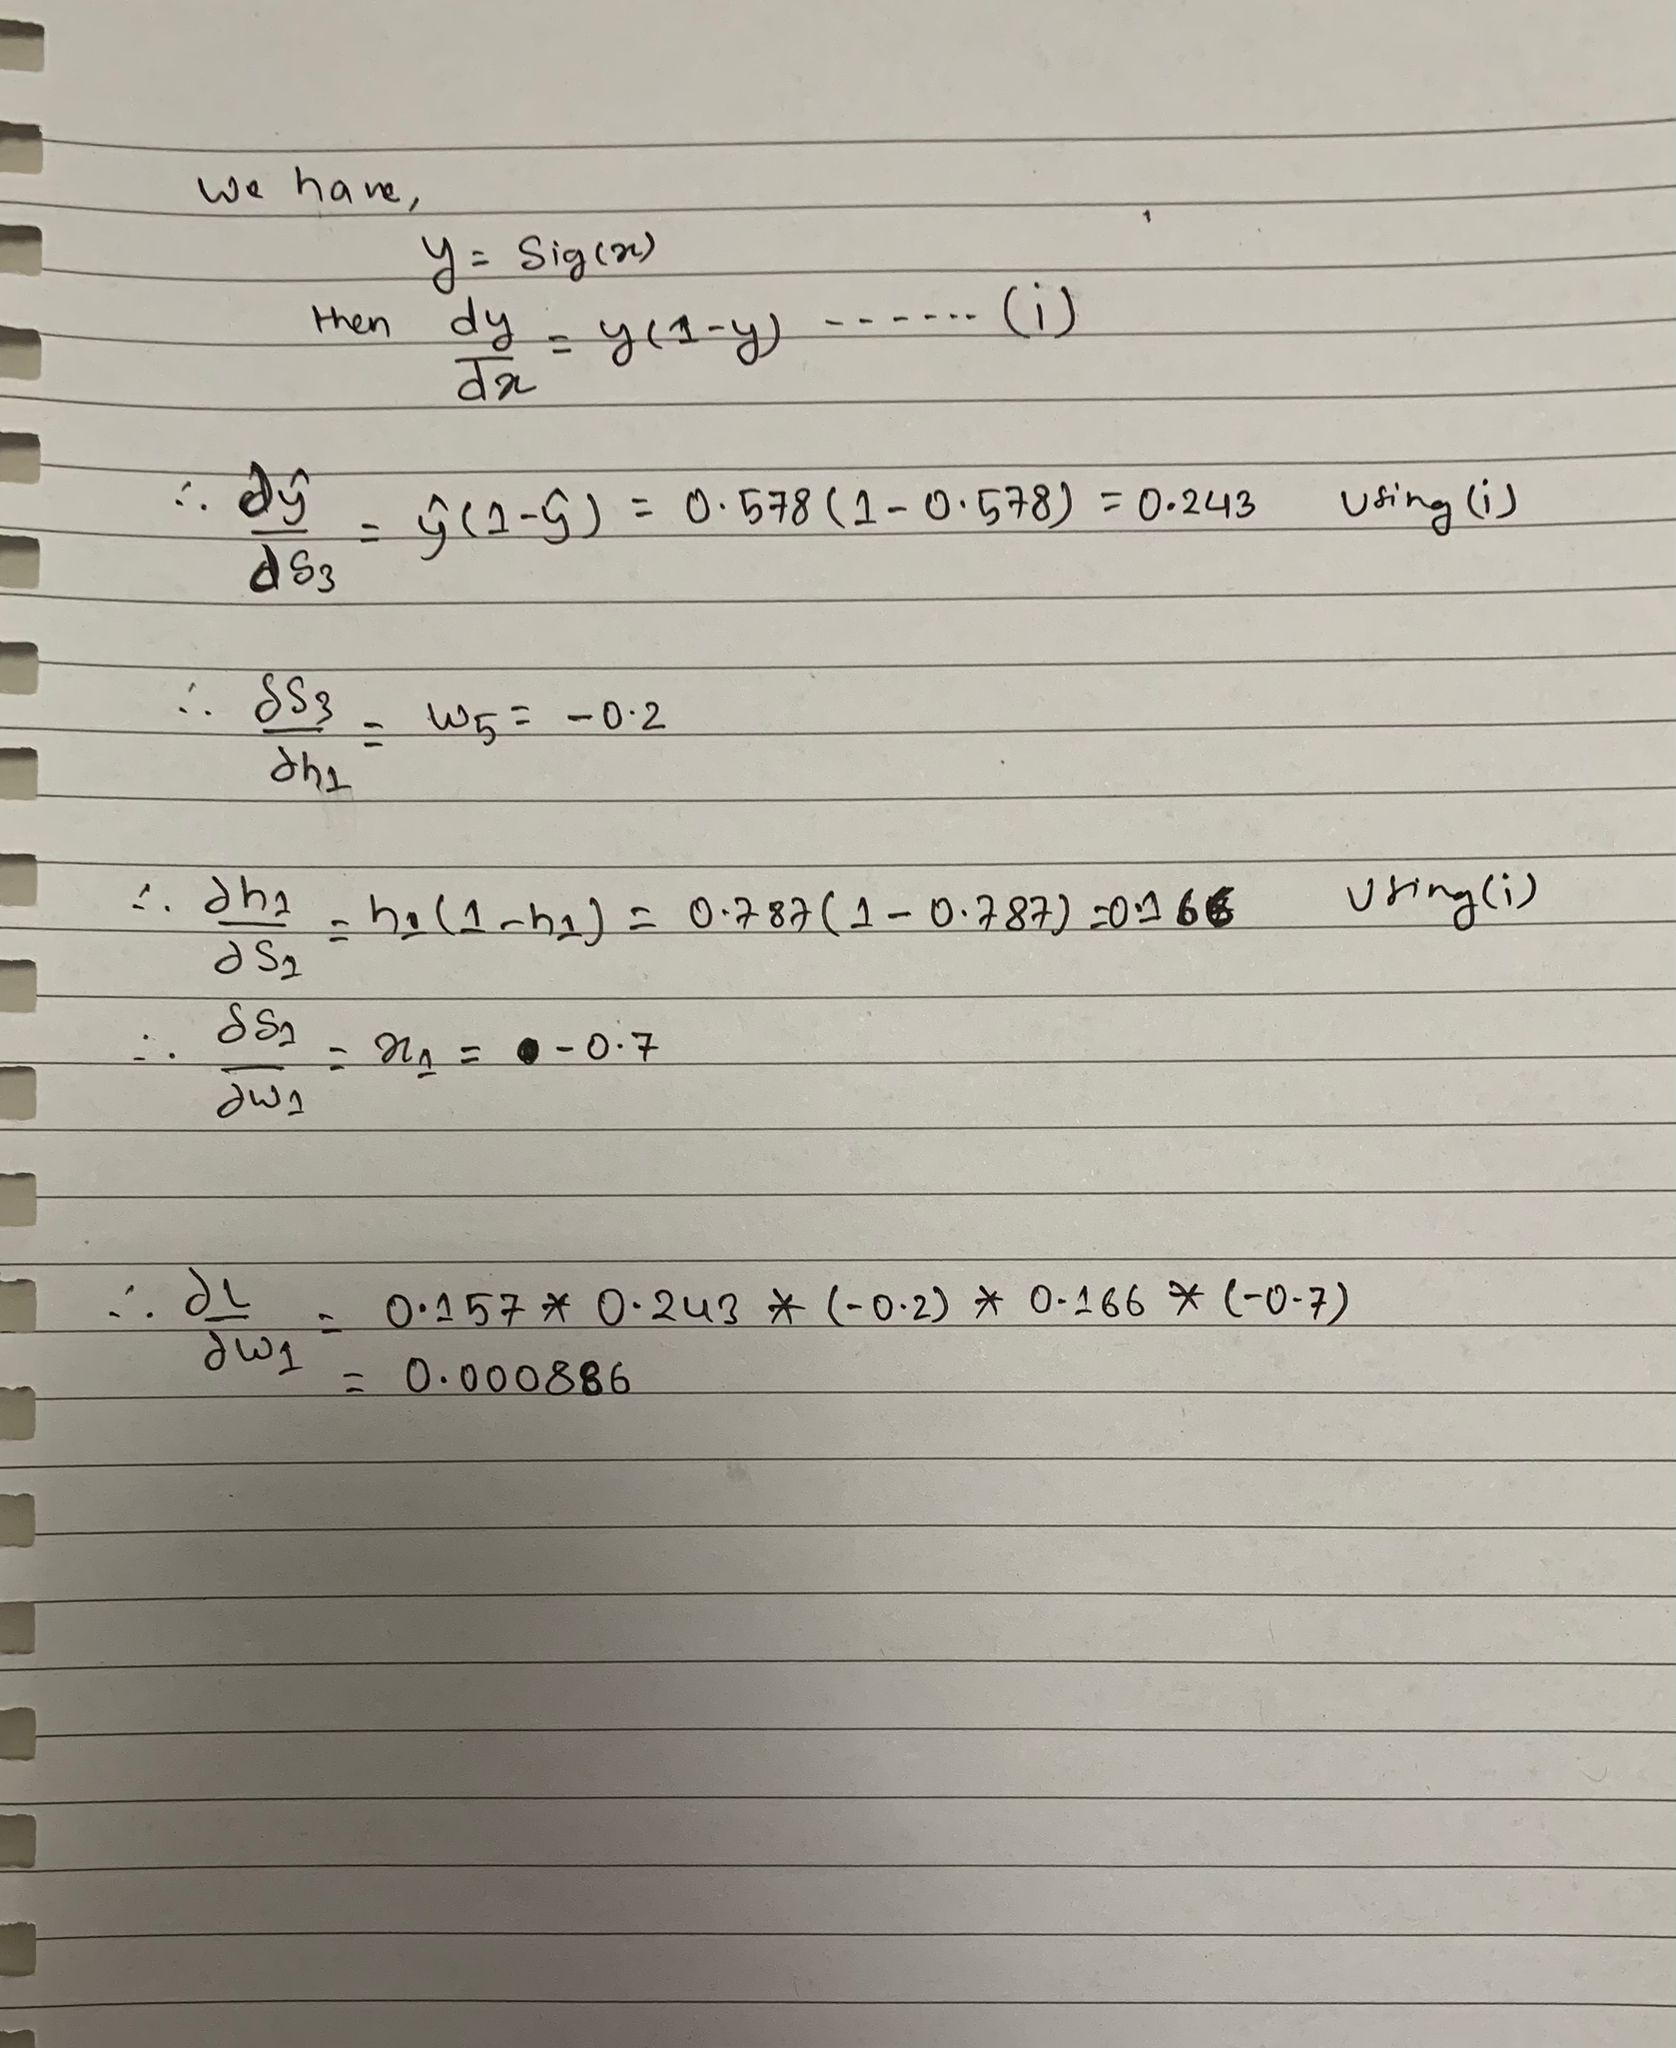

#Question 2

(a)

In [ ]:
import pandas as pd

train_df = pd.read_csv("trainData.txt")
test_df  = pd.read_csv("testData.txt")

print("Number of training samples:", len(train_df))
print("Number of test samples:", len(test_df))


Number of training samples: 8143
Number of test samples: 9752


In [ ]:
train_df.shape

(8143, 7)

In [ ]:
test_df.shape

(9752, 7)

(b)[2]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
feature_cols = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]
target_col = "Occupancy"

In [ ]:
X_train = train_df[feature_cols].values
y_train = train_df[target_col].values

In [ ]:
X_test  = test_df[feature_cols].values
y_test  = test_df[target_col].values

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
def build_model(units):
    model = Sequential([
        layers.Input(shape=(5,)),
        layers.Dense(units, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [ ]:
hidden_units = [2,4,6,8]
test_accuracy = []

In [ ]:
for h in hidden_units:
    print(f"\nTraining model with {h} hidden units")
    model = build_model(h)
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=64,
        verbose=0
    )
    loss ,acc = model.evaluate(X_test_scaled, y_test, verbose=0)
    test_accuracy.append(acc)


Training model with 2 hidden units

Training model with 4 hidden units

Training model with 6 hidden units

Training model with 8 hidden units


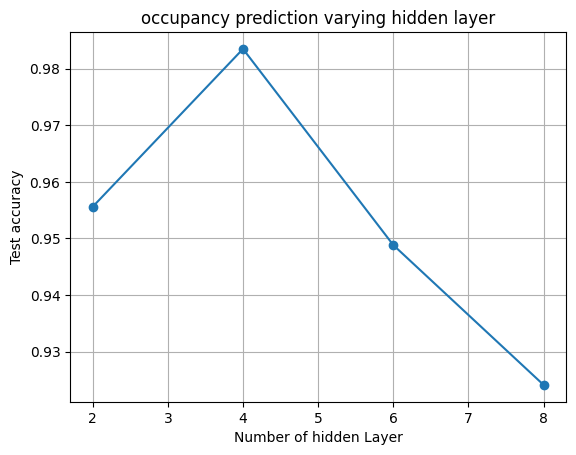

In [ ]:
plt.figure()
plt.plot(hidden_units, test_accuracy, marker="o")
plt.xlabel("Number of hidden Layer")
plt.ylabel("Test accuracy")
plt.title("occupancy prediction varying hidden layer")
plt.grid(True)
plt.show()

(C)[2]

In [ ]:
def build_model_with_Two(h1, h2):
    model = Sequential([
        layers.Input(shape=(5,)),
        layers.Dense(h1, activation="relu"),
        layers.Dense(h2, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [ ]:
two_layer_units = [(3, 2), (4, 3), (5, 4)]

In [ ]:
results = []

for h1, h2 in two_layer_units:
    expressed = f"5-{h1}-{h2}-1"
    print(f"\nTraining architecture {expressed}")
    model = build_model_with_Two(h1, h2)
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=64,
        verbose=0
    )
    loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
    results.append((expressed, acc))

print("\nSummary of 2-hidden-layer architectures:")
for name, acc in results:
    print(f"{name}: test accuracy = {acc:.3f}")


Training architecture 5-3-2-1

Training architecture 5-4-3-1

Training architecture 5-5-4-1

Summary of 2-hidden-layer architectures:
5-3-2-1: test accuracy = 0.931
5-4-3-1: test accuracy = 0.990
5-5-4-1: test accuracy = 0.933


(d)ans: From the experiments it looks like the model is quite sensitive to how many hidden units we choose. When we varied the number of neurons in a single hidden layer, the accuracy first increased and reached its best around 4 units with test accuracy 0.99, but after that it started dropping. This suggests that a small network is actually enough for this dataset and adding more units just makes it overfit. <br>
Similarly,The smallest architecture (5-3-2-1) doesnot perform that well,When we increased it to 5-4-3-1 the test accuracy jumped up to around 0.99, which is almost perfect, meaning this size seems to capture the complexity of the problem well. But when we added even more neurons (5-5-4-1) the accuracy actually went down again. This likely means the model started overfitting.<br>
Overall, a moderate number of hidden units seems to work best, while adding too many doesnot really help and sometimes even reduce the model performance.

#Question 3 (Ans)<br>
The authors applied a Recurrent Neural Network, especially an LSTM model to predict future stock market values. Executed on a set of financial data and the results showed that
LSTM was far more superior to ARIMA.Paper aim to use ML algorithm based on LSTM RNN to forecast
the adjusted closing prices for a portfolio of assets. The data in this paper consist of the daily opening prices of two stocks in the New York Stock Exchange NYSE,
GOOGL and NKE extracted from yahoo finance, for GOOGL data series cover the period going from
8/19/2004 to 12/19/2019 and for NKE the data cover the period from 1/4/2010 to 12/19/2019 and used 80:20 split ratio for model building. Summary shown in table 1 says that model consist 4 LSTM layers and 4 Drop out between them with  260065 trainable parameters and final dense layer that outputs a single predicted price value.The model was trained with mean squared error loss while experimenting with different numbers of epochs 12, 25, 50, 100

#References

[1] https://www.youtube.com/watch?v=ma6hWrU-LaI&t=2385s <br>
[2] https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?utm_source=chatgpt.com